<h2>Automobile: Exploratory Data Analysis</h4>
<H4>Raunak Singh</H4>

##### Objectives:
* Explore features or characteristics to predict price of car
* Analyze patterns and run descriptive statistical analysis
* Group data based on identified parameters and create pivot tables
* Identify the effect of independent attributes on price of cars

In [4]:
# Loading the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset onto a variable named 'url':
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

# Load the url data onto the dataframe named 'df':
df = pd.read_csv(url, header = 0)

In [5]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [6]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [7]:
# Calculating the correlation between variables of the types 'int64' or 'float64':
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


<h2>Continuous Numerical Variables:</h2> 

<p>Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data. This will be useful later on for visualizing the fit of the simple linear regression model as well. </p>


,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


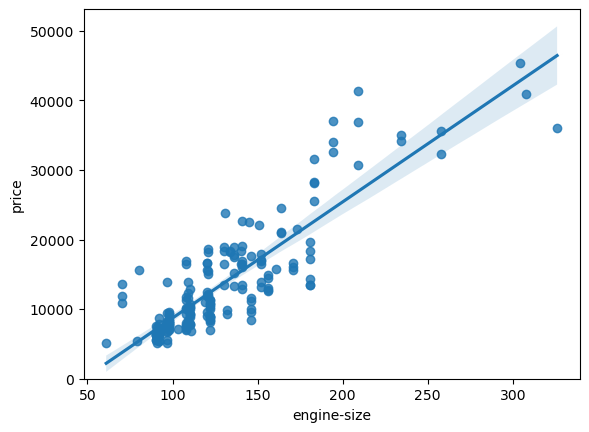

In [9]:
# 'Engine size' as a potential predictor of 'price'
sns.regplot(x = 'engine-size', y = 'price', data = df) # This defines the degree of correlation on the basis of the steepness of the slope between the two axes
plt.ylim(0,)

# NOTE: CORRELATION IS NOT A PROOF OF CAUSATION!!

df[['engine-size', 'price']].corr()

<h3>Strong Negative Linear Relationship</h3>

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


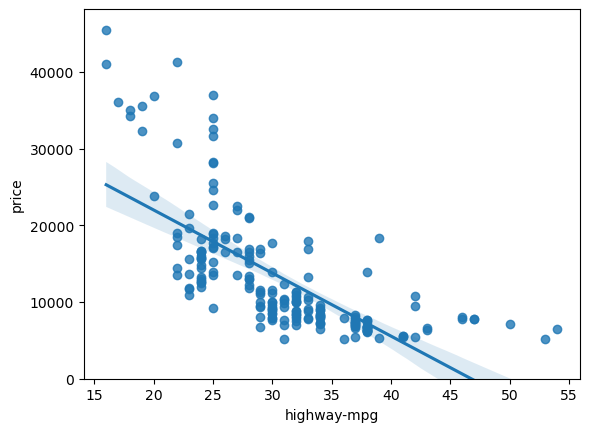

In [11]:
# Highway mpg and its relationship with the 
sns.regplot(x = 'highway-mpg', y = 'price', data = df)
plt.ylim(0,)
df[['highway-mpg', 'price']].corr()

<h3>Weak Linear Relationship</h3>

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


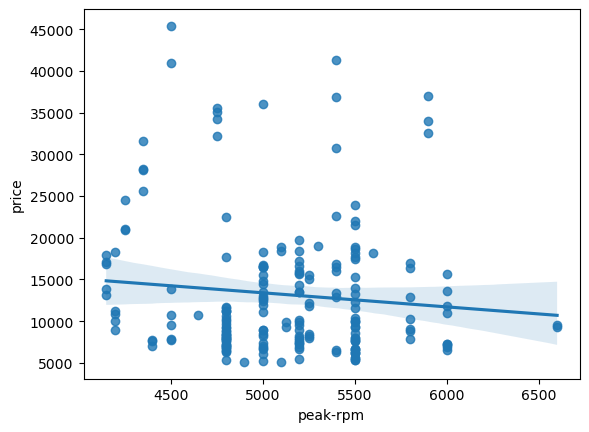

In [13]:
# Relationship between 'peak-rpm' vs. 'price':
sns.regplot(x = 'peak-rpm', y = 'price', data = df) # Weak relationship denoted by low steepness and many outliers indicating high variability
df[['peak-rpm', 'price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


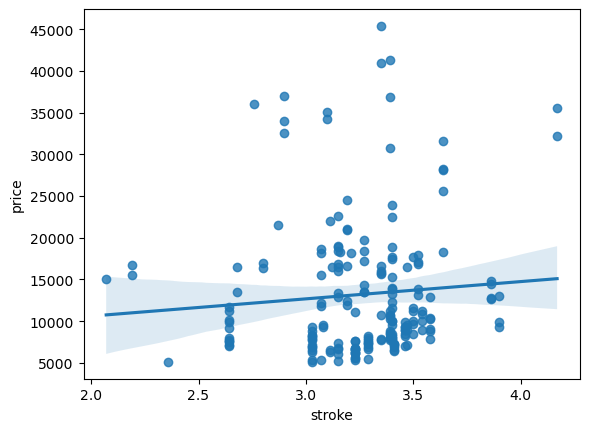

In [14]:
## Correlation between 'stroke' vs. 'price'
sns.regplot(x = 'stroke', y = 'price', data = df) # Denotes weak relationship as seen in the graph below
df[['stroke', 'price']].corr()

# NOTE:#There is a weak correlation between the variable 'stroke' and 'price.' as such regression will not work well. We can see this using "regplot" to demonstrate this.

<h3> Categorical Variables</h2>

##### These are variables that describe a characteristic of the data unit, and are selected from a small group of categories. 
* Categorical variables can be of data types – `'object'` or `'int64'`
* `Boxplots` are a good way to visualise categorical variables

<Axes: xlabel='body-style', ylabel='price'>

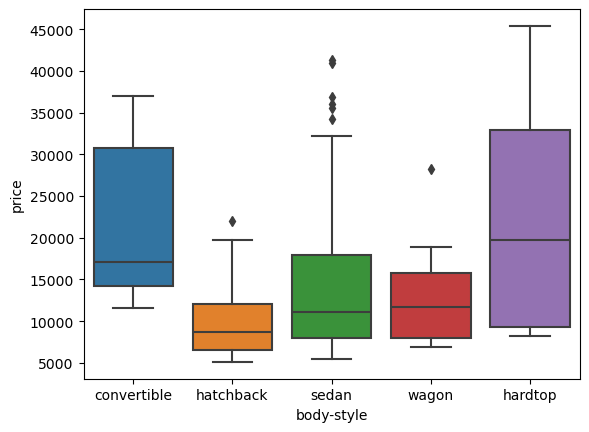

In [16]:
# Relationship between 'body-style' and 'price':
sns.boxplot(x = 'body-style', y = 'price', data = df)

# NOTE: There is a significant overlap between the different 'body-style', hence it is not a good predictor. 

<Axes: xlabel='drive-wheels', ylabel='price'>

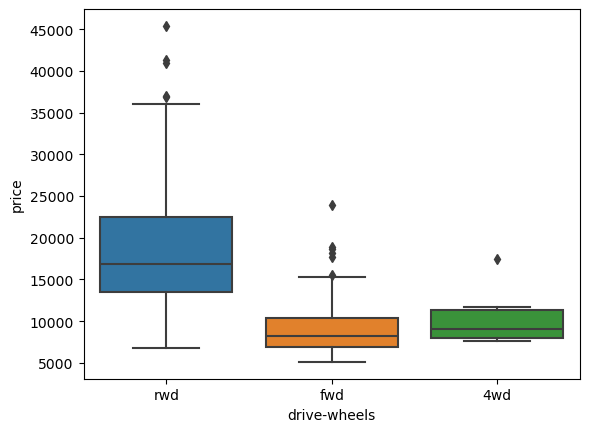

In [17]:
# Relationship between 'drive-wheels' and 'price':
sns.boxplot(x = 'drive-wheels', y = 'price', data = df)

# NOTE: The overlap is significantly lower as compared to the previous boxplot. Here, the relationship between the 'drive-wheels' and 'price' can be used as a potential predictor of the price of the automobile. 

<H3>Descriptive Statistical Analysis</H3>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:
<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>

In [19]:
df.describe() # By default, it includes only the continuous variables and excludes the NaN values

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [20]:
df.describe(include = ['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [21]:
df.describe(include = 'all') ## All the variables – 'object-type' and 'int/float-type' are included in the description

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
count,201.000000,201.00000,201,201,201,201,201,201,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,200,201.000000,201.000000
unique,NaN,NaN,22,2,2,5,3,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,toyota,std,four,sedan,fwd,front,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,NaN,NaN,32,165,115,94,118,198,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,0.837102,...,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,NaN,0.099502,0.900498
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,0.059213,...,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,NaN,0.300083,0.300083
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,...,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,NaN,0.000000,0.000000
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,0.801538,...,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,NaN,0.000000,1.000000
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,...,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,NaN,0.000000,1.000000
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,0.881788,...,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,NaN,0.000000,1.000000


<H3>Value Counts</H3>

<p>Value counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column "drive-wheels". Don’t forget the method "value_counts" only works on pandas series, not pandas dataframes. As a result, we only include one bracket <code>df['drive-wheels']</code>, not two brackets <code>df[['drive-wheels']]</code>.</p>


In [23]:
df['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

In [24]:
# Creating a dataframe derived from the data of the value_counts of the 'drive-wheels' and then renaming it for convenience: 
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame() # This converts the series of value_counts data into a dataframe
drive_wheels_counts.rename(columns = {'drive-wheels':'value_counts'}, inplace = True)
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [25]:
# Rename the index to 'drive-wheels'
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [26]:
# Repeating the process for 'engine-location' as a variable: 
engine_loc_counts = df['engine-location'].value_counts().to_frame() # This mounts the value_count data onto a new dataframe assigned to a variable named 'engine_loc_counts'
engine_loc_counts.rename(columns={'engine-location':'value_counts'}, inplace = True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


<H3>Basics of Grouping</H3>

The `'group_by()'` method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups. 

In [28]:
# Group the variable 'drive-wheels': 
# Our aim is to know which type of drive wheel is most valuable, so we can group 'drive-wheels' and then average them.
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [29]:
# Grouping of single variable:
df_grp_one = df[['drive-wheels', 'body-style', 'price']]
df_grouped = df_grp_one.groupby(['drive-wheels'], as_index = False).agg({'price':'mean'})
df_grouped # It can be concluded that the 'rwd' vehicles are more expensive amongst the group

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [30]:
# Grouping of multiple variables: 
df_gptest = df[['drive-wheels', 'body-style', 'price']] # A new dataframe derived from the exisitng dataframe 'df' with only three attributes/columns
grouped_test_1 = df_gptest.groupby(['drive-wheels', 'body-style'], as_index = False).mean() # Groups created with 2 variables and the mean of price calculated for each class respectively
grouped_test_1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<H3>Pivot Tables</H3>

The grouped data is much easier to visualise when it is made into a pivot table. A pivot table is like an excel sheet, with one variable along the column and another variable along the row. 

We can convert a dataframe into a pivot table using the method `pivot()` to create a pivot table from the groups specified in the dataframe. 

In [32]:
## In this case, I will create a pivot table for the grouped_test_1 dataframe created above: 
grouped_pivot_1 = grouped_test_1.pivot(index='drive-wheels', columns = 'body-style')

# Fill the empty/missing/NaN cells with some random integer (0/1 etc.):
grouped_pivot_1 = grouped_pivot_1.fillna(0) # Fill the missing values with 0 
grouped_pivot_1

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [33]:
# Use the group_by function to find the average 'price' of each car based on the 'body-style':
df_gptest_2 = df[['body-style', 'price']]
grouped_test_2 = df_gptest_2.groupby(['body-style'], as_index = False).mean()
grouped_test_2

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


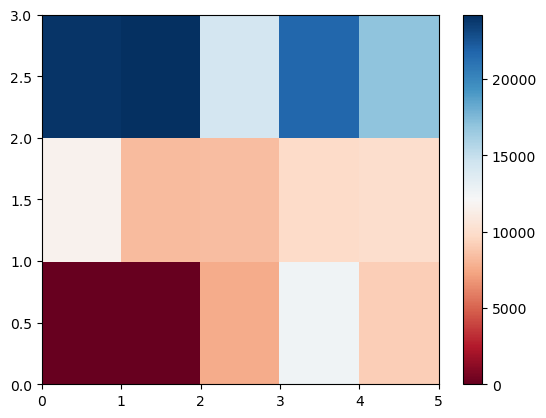

In [34]:
## Using the HEATMAP to visualise the relationship between Body Style and Price: 
## Use the goruped results to plot the heatmap: 
plt.pcolor(grouped_pivot_1, cmap = 'RdBu')
plt.colorbar()
plt.show()

<p>The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' on the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.</p>

<p>The default labels convey no useful information to us. I will now add labels to the heatmap to make it truly infromative. </p>

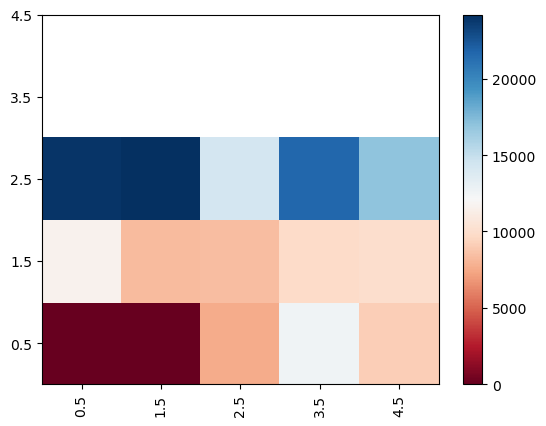

In [36]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot_1, cmap = 'RdBu')

# Label names 
row_labels = grouped_pivot_1.columns.levels[1]
col_labels = grouped_pivot_1.index

# Move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot_1.shape[1])+0.5, minor = False)
ax.set_yticks(np.arange(grouped_pivot_1.shape[1])+0.5, minor = False)

# Rotate label if too long
plt.xticks(rotation = 90)

fig.colorbar(im)
plt.show()

<h2>Correlation and Causation</h2>

__Correlation__: it is a measure of interdependence between variables. 

__Causation__: it is the relationship between cause and effect between two variables. 

* Correlation DOES NOT imply Causation.
* Determining Correlation is much simpler vs. Causation which may require independent experimentation.


<h4>Pearson Correlation:</h4>
It measures the linear dependence between two variables X and Y. 

The resulting coefficient is a value between -1 and 1 inclusive, where: 
* __1__: Perfect positive linear correlation.
* __0__: No linear correlation, the two variables most likely do not affect each other.
* __-1__: Perfect negative linear correlation.

Pearson Correlation is the default method of the function `.corr()`. It calculates the Pearson Correlation for __'int64'__ or __'float64'__ variables. 

<h4><b>P-value:</b></h4>
<p>P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the:
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


In [39]:
# The above information can be derived from the 'stats' module in the "scipy" library: 
from scipy import stats

<H3>Wheel-Base vs. Price</H3>
* Pearson Corerlation coefficient and p-value of 'wheel-base' and 'price'.

In [41]:
pearson_coef_1, p_value_1 = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation coefficient is:", pearson_coef_1, 
      "with a p-value of p =", p_value_1)

The Pearson Correlation coefficient is: 0.5846418222655085 with a p-value of p = 8.076488270732338e-20


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).</p>


<h3>Horsepower vs. Price</h3>
* Pearson Corerlation coefficient and p-value of 'horsepower' and 'price'.

In [44]:
pearson_coef_2, p_value_2 = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation coefficient is:", pearson_coef_2, 'with the p-value of p =', p_value_2)

The Pearson Correlation coefficient is: 0.8095745670036555 with the p-value of p = 6.369057428260921e-48


<h5>Conclusion:</h5>

<p>Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).</p>


<h3>Length vs. Price</h3>
* Pearson Corerlation coefficient and p-value of 'length' and 'price'.

In [47]:
pearson_coef_3, p_value_3 = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation coefficient is:", pearson_coef_3, 'with the p-value of p =', p_value_3)

The Pearson Correlation coefficient is: 0.6906283804483644 with the p-value of p = 8.016477466158386e-30


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).</p>


<h3>Width vs. Price</h3>
* Pearson Corerlation coefficient and p-value of 'width' and 'price'.

In [50]:
pearson_coef_4, p_value_4 = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation coefficient is: ", pearson_coef_4, "with the p-value of p =", p_value_4)

The Pearson Correlation coefficient is:  0.7512653440522666 with the p-value of p = 9.200335510483504e-38


##### Conclusion:

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).


### Curb-Weight vs. Price
* Pearson Corerlation coefficient and p-value of 'curb-weight' and 'price'.

In [53]:
pearson_coef_5, p_value_5 = stats.pearsonr(df['curb-weight'], df['price'])
print("The Pearson Correlation coefficient is:", pearson_coef_5, 'with the p-value of p =', p_value_5)

The Pearson Correlation coefficient is: 0.834414525770285 with the p-value of p = 2.189577238893392e-53


##### Conclusion:
<p>Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).</p>


<h3>Engine-Size vs. Price</h3>
* Pearson Correlation coefficient and p-value of 'engine-size' and 'price'.

In [56]:
pearson_coef_6, p_value_6 = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation coefficient is:", pearson_coef_6, 'with the p-value of p =', p_value_6)

The Pearson Correlation coefficient is: 0.8723351674455186 with the p-value of p = 9.26549162219736e-64


<h5>Conclusion:</h5>

<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>


<h3>Bore vs. Price</h3>
* Pearson Correlation coefficient and p-value of 'bore' and 'price'.

In [59]:
pearson_coef_7, p_value_7 = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation coefficient is:", pearson_coef_7, 'with the p-value of p =', p_value_7)

The Pearson Correlation coefficient is: 0.5431553832626603 with the p-value of p = 8.049189483935318e-17


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).</p>


<h3>City-mpg vs. Price</h3>
* Pearson Correlation coefficient and p-value of 'city-mpg' and 'price'.

In [65]:
pearson_coef_8, p_value_8 = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is:", pearson_coef_8, " with a p-value of p =", p_value_8)  

The Pearson Correlation Coefficient is: -0.6865710067844684  with a p-value of p = 2.3211320655672357e-29


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.</p>


<h3>Highway-mpg vs. Price</h3>
* Pearson Correlation coefficient and p-value of 'highway-mpg' and 'price'.

In [69]:
pearson_coef_9, p_value_9 = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is:", pearson_coef_9, " with a p-value of p =", p_value_9) 

The Pearson Correlation Coefficient is: -0.7046922650589533  with a p-value of p = 1.7495471144474797e-31


<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>
 Conclusion:
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.
